In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import datetime
from IPython.display import clear_output
from datetime import timedelta
from scipy.stats import skewnorm
import inspect, re
import h2o
from h2o.automl import H2OAutoML
               
%load_ext autoreload
%autoreload 2

%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
fy_10 = pd.read_excel("budget-vs-actuals-revenue-and-expenses-fy10-operating-budget.xlsx")
fy_11 = pd.read_excel("budget-vs-actuals-revenue-and-expenses-fy11-operating-budget.xlsx")
fy_12 = pd.read_excel("budget-vs-actuals-revenue-and-expenses-fy12-operating-budget.xlsx")
fy_13 = pd.read_excel("budget-vs-actuals-revenue-and-expenses-fy13-operating-budget.xlsx")
fy_14 = pd.read_excel("budget-vs-actuals-revenue-and-expenses-fy14-operating-budget.xlsx")
fy_15 = pd.read_excel("budget-vs-actuals-revenue-and-expenses-fy15-operating-budget.xlsx")
fy_16 = pd.read_excel("fy16-budget-vs-actuals-revenue-and-expenses.xls")

OA_mid10 = np.array([])
OA_mid11 = np.array([])
OA_mid12 = np.array([])
OA_mid13 = np.array([])
OA_mid14 = np.array([])
OA_mid15 = np.array([])
OA_mid16 = np.array([])

#Clean up the formating of FY16
fy_16.columns = fy_16.loc[0].values
fy_16 = fy_16.loc[1:]

fy_list = [fy_10, fy_11, fy_12, fy_13, fy_14, fy_15, fy_16]
OA_middle_list = [OA_mid10, OA_mid11,OA_mid12,OA_mid13,OA_mid14,OA_mid15,OA_mid16]

for i, year in enumerate(fy_list):
    year['OA_Difference'] = year['Actuals']-year['Original Budget']
    OA_middle_list[i] = np.array(list(year.loc[(year['OA_Difference']>=year['OA_Difference'].quantile(.10)) & (year['OA_Difference']<=year['OA_Difference'].quantile(.90))]['OA_Difference']))

df = pd.concat(fy_list)

In [10]:
# %%capture --no-display
# pandas_profiling.ProfileReport(df)

In [11]:
df.['OA_Difference'].std()

2070853.8500658637

In [57]:
OA_diff_middle = df.loc[(df['OA_Difference']>=df['OA_Difference'].quantile(.10)) & (df['OA_Difference']<=df['OA_Difference'].quantile(.90))]['OA_Difference']


In [58]:
OA_diff_middle =  np.array(list(OA_diff_middle))

In [59]:
OA_diff = np.array(list(df['OA_Difference']))

In [60]:
pd.Series(OA_diff).describe()

count    1.967090e+05
mean    -3.203887e+03
std      2.070854e+06
min     -3.369572e+08
25%     -1.885470e+03
50%     -1.300000e+01
75%      4.296300e+02
max      3.345000e+08
dtype: float64

(array([  1700.,   2048.,   3067.,   3739.,   6724.,  13853., 101928.,
         15456.,   5524.,   3328.]),
 array([-16236.63 , -13811.252, -11385.874,  -8960.496,  -6535.118,
         -4109.74 ,  -1684.362,    741.016,   3166.394,   5591.772,
          8017.15 ]),
 <a list of 10 Patch objects>)

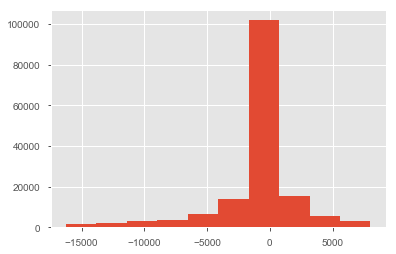

In [61]:
plt.hist(OA_diff_middle)
#plt.xlim(-2e8,2e8)

Text(0.5, 0, 'Difference Between Budgeted and Actual')

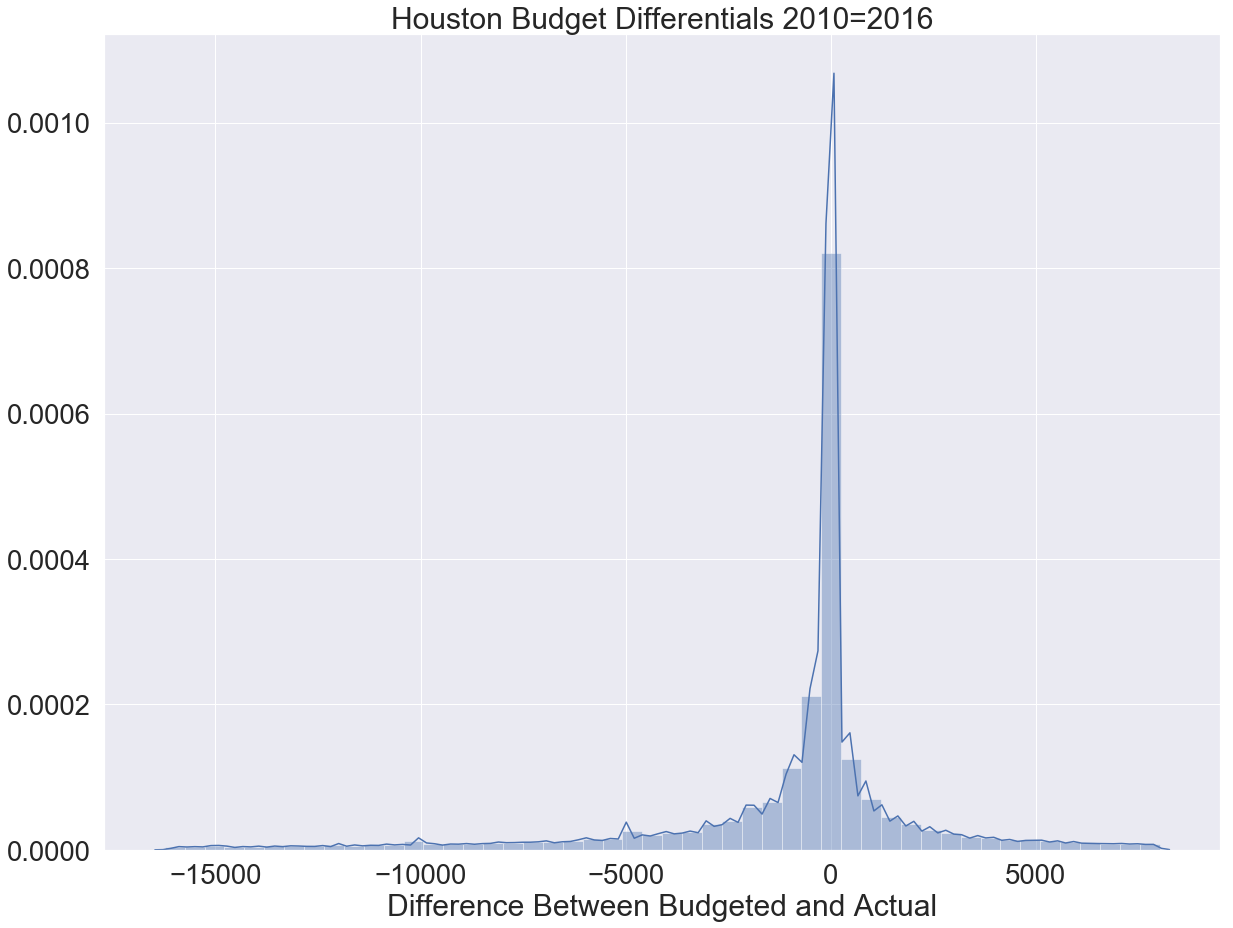

In [65]:
sns.set_style('darkgrid')
sns.set(font_scale=2.5)

fig, ax = plt.subplots(figsize=(20,15))
sns.distplot(OA_diff_middle, ax=ax)

ax.set_title("Houston Budget Differentials 2010=2016")
#ax.set_ylabel("Frequency")
ax.set_xlabel("Difference Between Budgeted and Actual")

Text(0.5, 0, 'Difference Between Budgeted and Actual')

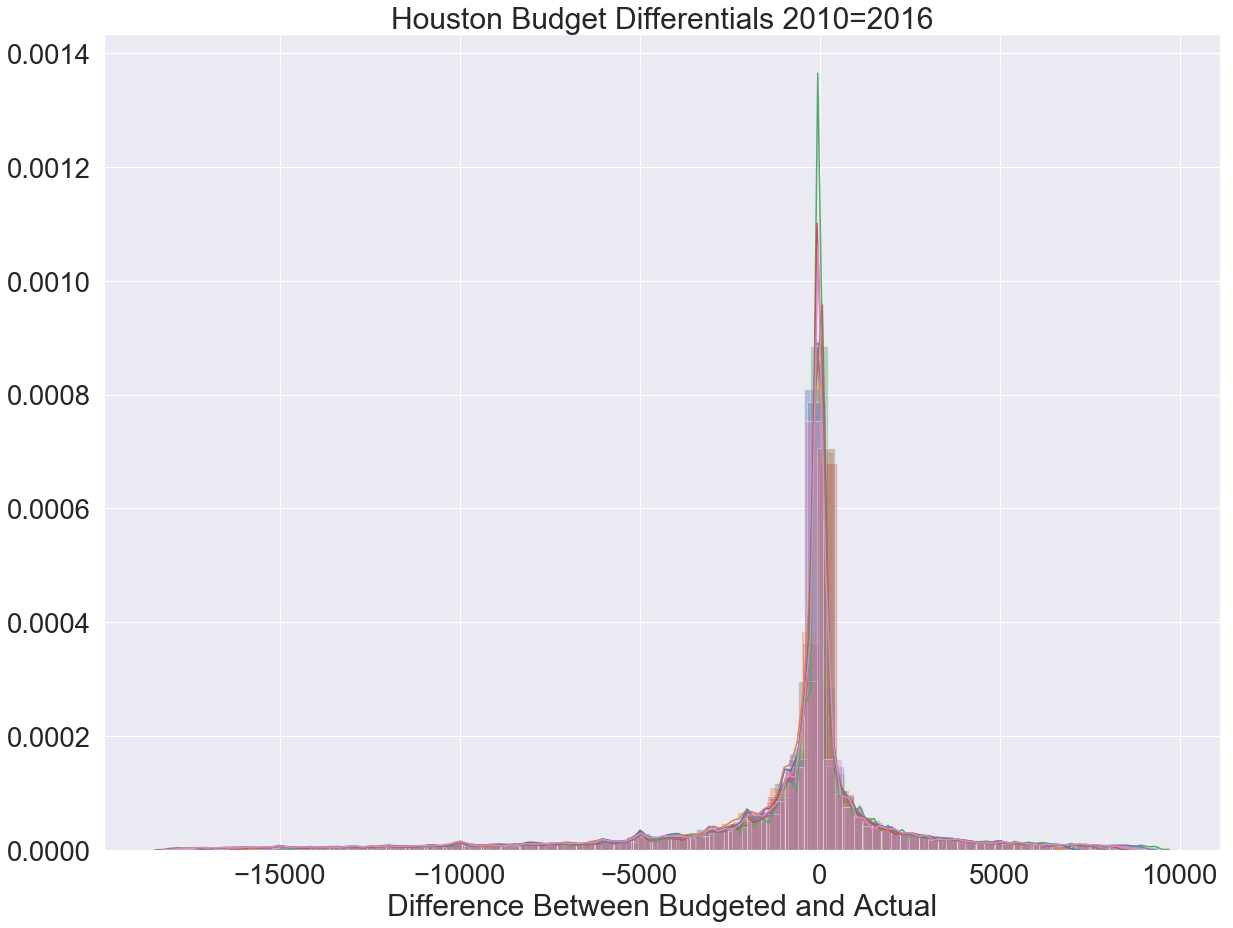

In [69]:
sns.set_style('darkgrid')
sns.set(font_scale=2.5)


fig, ax = plt.subplots(figsize=(20,15))

for year in OA_middle_list:
    sns.distplot(year, ax=ax)

ax.set_title("Houston Budget Differentials 2010=2016")
#ax.set_ylabel("Frequency")
ax.set_xlabel("Difference Between Budgeted and Actual")